In [1]:
print("HELLO WOLRD!!")

HELLO WOLRD!!


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
project_id = 'nida-workshop'

sql ='''
SELECT
  CUST_CODE,
  COUNT(DISTINCT BASKET_ID) AS TOTAL_VISIT,
  COUNT(DISTINCT PROD_CODE) TOTAL_PRODUCT,
  SUM(SPEND) AS TOTAL_SALES
FROM
  `nida-workshop.SUPERMARKET.TRANSACTIONS`
WHERE
  CUST_CODE IS NOT NULL
GROUP BY
  CUST_CODE
'''

df = pd.io.gbq.read_gbq(sql, project_id=project_id, verbose=False,dialect='standard')

In [31]:
df.head(5)

,CUST_CODE,TOTAL_VISIT,TOTAL_PRODUCT,TOTAL_SALES,cluster
0,CUST0000506100,256,259,1265.47,2
1,CUST0000839736,256,284,1942.89,2
2,CUST0000203059,256,332,1940.00,2
3,CUST0000954371,512,539,4628.97,3
4,CUST0000200588,512,616,4849.05,3


In [32]:
df.mean()

TOTAL_VISIT       78.064000
TOTAL_PRODUCT    165.541800
TOTAL_SALES      967.003348
cluster            2.311400
dtype: float64

In [33]:
df.sum()

CUST_CODE        CUST0000506100CUST0000839736CUST0000203059CUST...
TOTAL_VISIT                                                 390320
TOTAL_PRODUCT                                               827709
TOTAL_SALES                                            4.83502e+06
cluster                                                      11557
dtype: object

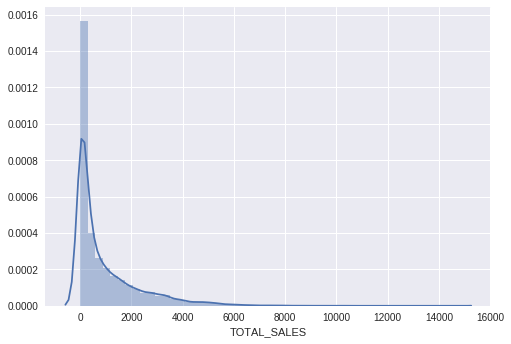

In [34]:
sns.distplot(df["TOTAL_SALES"])

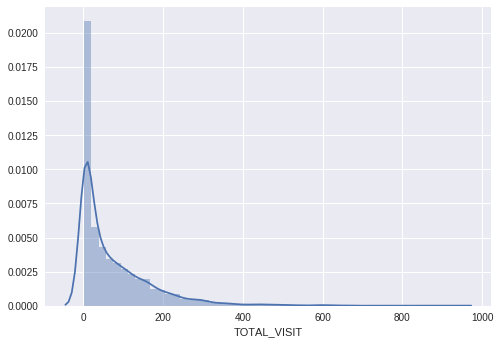

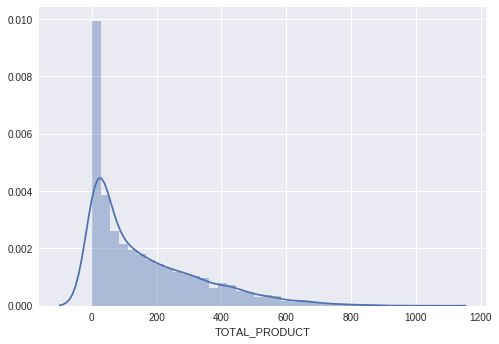

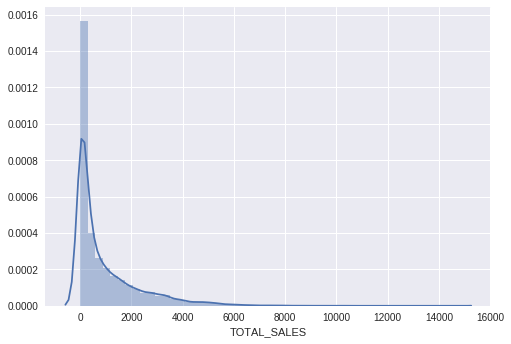

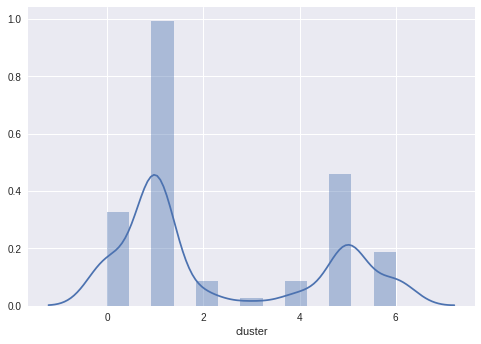

In [35]:
for i ,col in enumerate(df.columns[1:]):
  sns.plt.figure(i)
  sns.distplot(df[col])
  sns.plt.savefig(col+'.png')

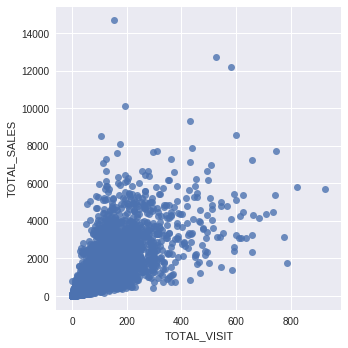

In [36]:
sns.lmplot(x='TOTAL_VISIT', y='TOTAL_SALES', data=df, fit_reg=False)

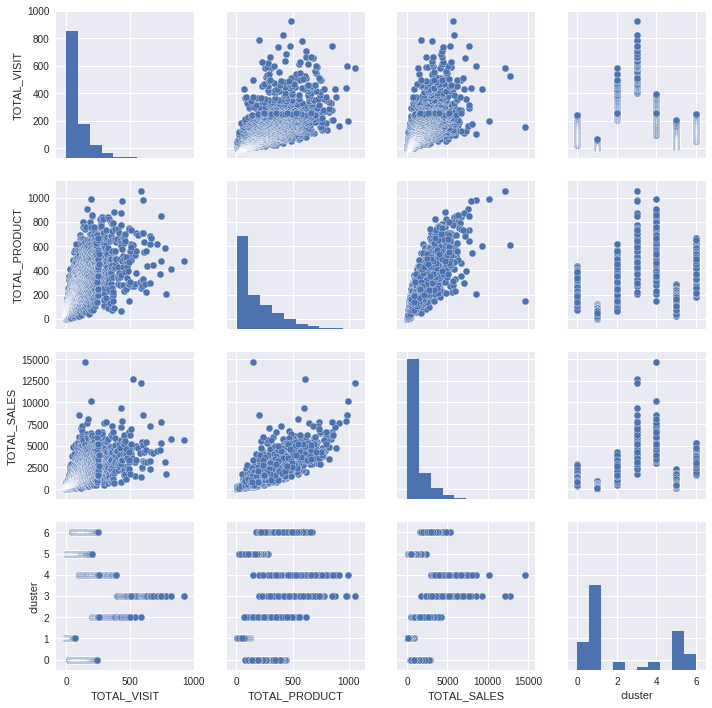

In [37]:
sns.pairplot(df)

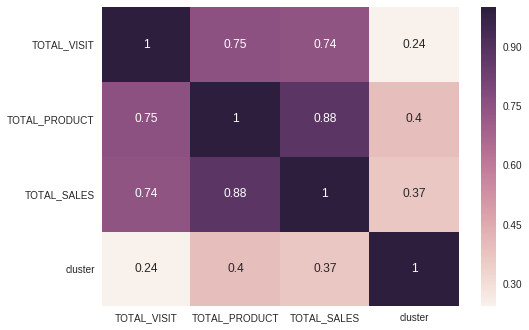

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
from sklearn.preprocessing import StandardScaler
df_std = pd.DataFrame(StandardScaler().fit_transform(df[df.columns[1:]]))
df_std.head(5)

,0,1,2,3
0,1.750567,0.539427,0.222925,-0.148225
1,1.750567,0.683723,0.728891,-0.148225
2,1.750567,0.960772,0.726733,-0.148225
3,4.269142,2.155545,2.735129,0.327770
4,4.269142,2.599978,2.899508,0.327770


In [0]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=7)

In [41]:
df['cluster'] = cluster.fit_predict(df_std)
df.head(5)

,CUST_CODE,TOTAL_VISIT,TOTAL_PRODUCT,TOTAL_SALES,cluster
0,CUST0000506100,256,259,1265.47,3
1,CUST0000839736,256,284,1942.89,3
2,CUST0000203059,256,332,1940.00,3
3,CUST0000954371,512,539,4628.97,5
4,CUST0000200588,512,616,4849.05,5


In [42]:
df.cluster.value_counts()

1    2290
2    1057
6     754
4     429
3     203
0     201
5      66
Name: cluster, dtype: int64

have 7 row from k=7  and group by cluster put in the NO_CUST_CODE

In [43]:
dfCluster = df.groupby('cluster', as_index=False).mean()
dfCluster['NO_CUST_CODE'] = df[['cluster','CUST_CODE']].groupby('cluster').count()

dfCluster

,cluster,TOTAL_VISIT,TOTAL_PRODUCT,TOTAL_SALES,NO_CUST_CODE
0,0,236.671642,584.751244,4762.613930,201
1,1,9.958952,29.131878,88.372092,2290
2,2,63.564806,144.408704,596.283065,1057
3,3,303.921182,340.172414,2119.112365,203
4,4,147.508159,420.790210,2861.473054,429
5,5,554.863636,569.984848,4892.665303,66
6,6,120.897878,270.064987,1411.698130,754


plot

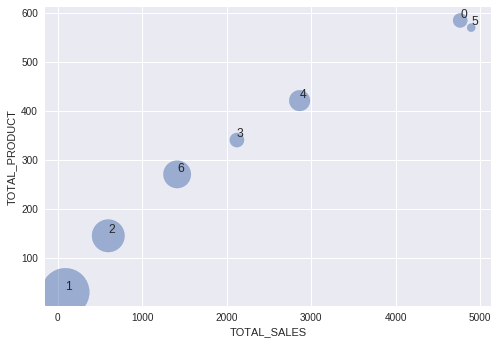

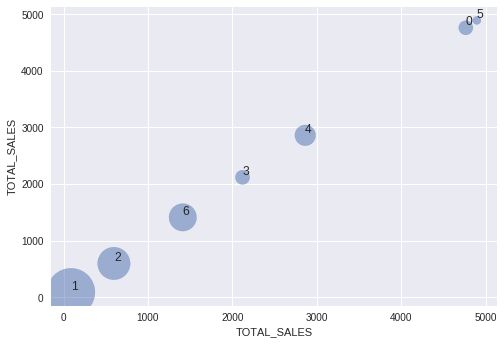

In [45]:
for i, col in enumerate(dfCluster.columns[2:4]):
  sns.plt.figure(i)
  fig, ax = sns.plt.subplots()
  ax.scatter(dfCluster['TOTAL_SALES'], dfCluster[col], s=dfCluster['NO_CUST_CODE'], alpha = 0.5)
  ax.set_xlabel("TOTAL_SALES")
  ax.set_ylabel(col)
  for j, txt in enumerate(dfCluster['cluster']):
    ax.annotate(txt, (dfCluster['TOTAL_SALES'][j], dfCluster[col][j]), horizontalalignment='middle',
verticalalignment='middle')

focus the middle group not make campain group 1 becuse not high profit
group 0, 5 not campain because thir have high value he don't mind